In [1]:
%pylab inline
import os
import gc
import scipy
import smatch
import numpy as np
import catutil as utilities
import imgSimutil as imgUtil
import astropy.io.fits as pyfits
import astropy.io.ascii as ascii
from astropy.table import Table,vstack,hstack
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [1]:
cd wrkDir/FPFS2/sim2/

/lustre/work/xiangchong.li/work/FPFS2/sim2


In [4]:
pltDir='plot/cosmozBlending/'
if not os.path.isdir(pltDir):
    os.mkdir(pltDir)
    
def estimate_mArray(d2222,d0000,d2000,d0200,d0020,d0002):
    bz1o=(np.average(d2222['e1_z1'],weights=d2222['n_z1'])-np.average(d0000['e1_z1'],weights=d0000['n_z1']))/0.04
    bz2o=(np.average(d2222['e1_z2'],weights=d2222['n_z2'])-np.average(d0000['e1_z2'],weights=d0000['n_z2']))/0.04
    bz3o=(np.average(d2222['e1_z3'],weights=d2222['n_z3'])-np.average(d0000['e1_z3'],weights=d0000['n_z3']))/0.04
    bz4o=(np.average(d2222['e1_z4'],weights=d2222['n_z4'])-np.average(d0000['e1_z4'],weights=d0000['n_z4']))/0.04
    bz1n=(np.average(d2000['e1_z1'],weights=d2000['n_z1'])-np.average(d0000['e1_z1'],weights=d0000['n_z1']))/0.04
    bz2n=(np.average(d0200['e1_z2'],weights=d0200['n_z2'])-np.average(d0000['e1_z2'],weights=d0000['n_z2']))/0.04
    bz3n=(np.average(d0020['e1_z3'],weights=d0020['n_z3'])-np.average(d0000['e1_z3'],weights=d0000['n_z3']))/0.04
    bz4n=(np.average(d0002['e1_z4'],weights=d0002['n_z4'])-np.average(d0000['e1_z4'],weights=d0000['n_z4']))/0.04
    dmz1=bz1n/bz1o-1
    dmz2=bz2n/bz2o-1
    dmz3=bz3n/bz3o-1
    dmz4=bz4n/bz4o-1
    mArray=np.array([dmz1,dmz2,dmz3,dmz4])
    return mArray

def estimate_mArray2(d2222,d0000,d2000,d0200,d0020,d0002):
    bz1o=(np.average(d2222['e1_z1'],weights=d2222['n_z1'])-np.average(d0000['e1_z1'],weights=d0000['n_z1']))/0.04
    bz2o=(np.average(d2222['e1_z2'],weights=d2222['n_z2'])-np.average(d0000['e1_z2'],weights=d0000['n_z2']))/0.04
    bz3o=(np.average(d2222['e1_z3'],weights=d2222['n_z3'])-np.average(d0000['e1_z3'],weights=d0000['n_z3']))/0.04
    bz4o=(np.average(d2222['e1_z4'],weights=d2222['n_z4'])-np.average(d0000['e1_z4'],weights=d0000['n_z4']))/0.04
    bz1o=bz1o*np.sum(d0000['n_z1'])
    bz2o=bz2o*np.sum(d0000['n_z2'])
    bz3o=bz3o*np.sum(d0000['n_z3'])
    bz4o=bz4o*np.sum(d0000['n_z4'])
    
    bz1n=(np.dot(d2000['e1_z1'],d2000['n_z1'])-np.dot(d0000['e1_z1'],d0000['n_z1']))/0.04
    bz2n=(np.dot(d0200['e1_z2'],d0200['n_z2'])-np.dot(d0000['e1_z2'],d0000['n_z2']))/0.04
    bz3n=(np.dot(d0020['e1_z3'],d0020['n_z3'])-np.dot(d0000['e1_z3'],d0000['n_z3']))/0.04
    bz4n=(np.dot(d0002['e1_z4'],d0002['n_z4'])-np.dot(d0000['e1_z4'],d0000['n_z4']))/0.04
    dmz1=bz1n/bz1o-1
    dmz2=bz2n/bz2o-1
    dmz3=bz3n/bz3o-1
    dmz4=bz4n/bz4o-1
    mArray=np.array([dmz1,dmz2,dmz3,dmz4])
    return mArray

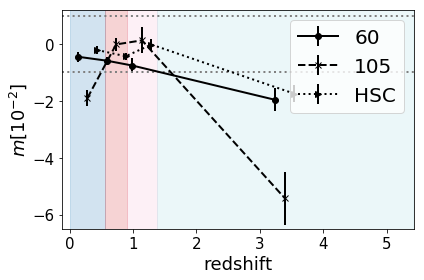

In [5]:
Dir='outCosmoR-var36em4/mag245-res03-bm38/'
lList=['60','105','HSC']
zbound  =   np.array([0.,0.561,0.906,1.374,5.410])
bAll=[]
errAll=[]
for psz in lList:
    err=[]
    fname=os.path.join(Dir,'e1_g1-2222_psf%s.fits' %psz)
    d2222=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0000_psf%s.fits' %psz)
    d0000=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-2000_psf%s.fits' %psz)
    d2000=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0200_psf%s.fits' %psz)
    d0200=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0020_psf%s.fits' %psz)
    d0020=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0002_psf%s.fits' %psz)
    d0002=pyfits.getdata(fname)
    mArray=estimate_mArray(d2222,d0000,d2000,d0200,d0020,d0002)
    bAll.append(mArray)
    ngroup=len(d0000)
    for ig in range(200):
        d2222c=np.delete(d2222,ig)
        d0000c=np.delete(d0000,ig)
        d2000c=np.delete(d2000,ig)
        d0200c=np.delete(d0200,ig)
        d0020c=np.delete(d0020,ig)
        d0002c=np.delete(d0002,ig)
        mArrayc=estimate_mArray(d2222c,d0000c,d2000c,d0200c,d0020c,d0002c)
        err.append(mArrayc-mArray)
        del d2222c,d0000c,d2000c,d0200c,d0020c,d0002c,mArrayc
        gc.collect()
    errAll.append(np.sqrt(np.sum(np.vstack(err)**2.,axis=0)))
    del err,mArray
    gc.collect()

lsList=['o-','x--','>:']
ishift=[-0.15,0,0.15]
for i in range(len(lList)):
    plt.errorbar((zbound[:-1]+zbound[1:])/2.+ishift[i],bAll[i]*100,errAll[i]*100,ls=lsList[i][1:],\
                 marker=lsList[i][0],label=lList[i],c='black')
cmap = cm.tab20
norm = Normalize(vmin=0, vmax=len(zbound)-2)
for iz in range(len(zbound)-1):
    cc=cmap(norm(iz))
    plt.axvspan(zbound[iz],zbound[iz+1],alpha=0.2, color=cc)
plt.plot(np.linspace(-0.12,5.43,20),-0.98*np.ones(20),c='grey',ls=':')
plt.plot(np.linspace(-0.12,5.43,20),0.98*np.ones(20),c='grey',ls=':')
plt.legend(loc='upper right')
plt.ylabel(r'$m [10^{-2}]$')
plt.xlabel('redshift')
plt.xlim(-0.12,5.43)
plt.ylim(-6.5,1.2)
plt.tight_layout()
np.save(os.path.join(Dir,'bAll.npy'),bAll)
np.save(os.path.join(Dir,'errAll.npy'),errAll)
plt.savefig(os.path.join(pltDir,'%s-%s.png' %tuple(Dir.split('/')[:-1])))
plt.savefig(os.path.join(pltDir,'%s-%s.pdf' %tuple(Dir.split('/')[:-1])))

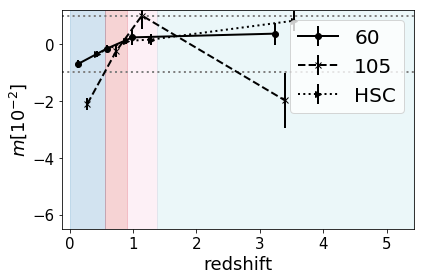

In [6]:
Dir='outCosmoE-var36em4/mag245-res03-bm38/'
lList=['60','105','HSC']
zbound  =   np.array([0.,0.561,0.906,1.374,5.410])
bAll=[]
errAll=[]
for psz in lList:
    err=[]
    fname=os.path.join(Dir,'e1_g1-2222_psf%s.fits' %psz)
    d2222=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0000_psf%s.fits' %psz)
    d0000=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-2000_psf%s.fits' %psz)
    d2000=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0200_psf%s.fits' %psz)
    d0200=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0020_psf%s.fits' %psz)
    d0020=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0002_psf%s.fits' %psz)
    d0002=pyfits.getdata(fname)
    mArray=estimate_mArray(d2222,d0000,d2000,d0200,d0020,d0002)
    bAll.append(mArray)
    ngroup=len(d0000)
    for ig in range(200):
        d2222c=np.delete(d2222,ig)
        d0000c=np.delete(d0000,ig)
        d2000c=np.delete(d2000,ig)
        d0200c=np.delete(d0200,ig)
        d0020c=np.delete(d0020,ig)
        d0002c=np.delete(d0002,ig)
        mArrayc=estimate_mArray(d2222c,d0000c,d2000c,d0200c,d0020c,d0002c)
        err.append(mArrayc-mArray)
        del d2222c,d0000c,d2000c,d0200c,d0020c,d0002c,mArrayc
        gc.collect()
    errAll.append(np.sqrt(np.sum(np.vstack(err)**2.,axis=0)))
    del err,mArray
    gc.collect()

lsList=['o-','x--','>:']
ishift=[-0.15,0,0.15]
for i in range(len(lList)):
    plt.errorbar((zbound[:-1]+zbound[1:])/2.+ishift[i],bAll[i]*100,errAll[i]*100,ls=lsList[i][1:],\
                 marker=lsList[i][0],label=lList[i],c='black')
cmap = cm.tab20
norm = Normalize(vmin=0, vmax=len(zbound)-2)
for iz in range(len(zbound)-1):
    cc=cmap(norm(iz))
    plt.axvspan(zbound[iz],zbound[iz+1],alpha=0.2, color=cc)
plt.plot(np.linspace(-0.12,5.43,20),-0.98*np.ones(20),c='grey',ls=':')
plt.plot(np.linspace(-0.12,5.43,20),0.98*np.ones(20),c='grey',ls=':')
plt.legend(loc='upper right')
plt.ylabel(r'$m [10^{-2}]$')
plt.xlabel('redshift')
plt.xlim(-0.12,5.43)
plt.ylim(-6.5,1.2)
plt.tight_layout()
plt.savefig(os.path.join(Dir,'out.png'))
np.save(os.path.join(Dir,'bAll.npy'),bAll)
np.save(os.path.join(Dir,'errAll.npy'),errAll)
plt.savefig(os.path.join(pltDir,'%s-%s.png' %tuple(Dir.split('/')[:-1])))
plt.savefig(os.path.join(pltDir,'%s-%s.pdf' %tuple(Dir.split('/')[:-1])))

/lustre/work/xiangchong.li/ana/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


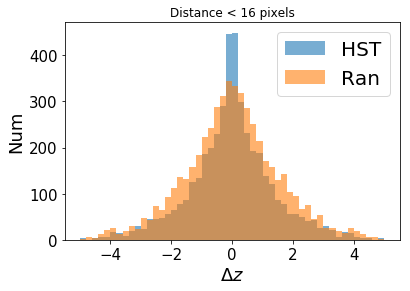

In [4]:
plt.close()
hstcat =    pyfits.getdata('hstcatE.fits')
xyRef   =   np.vstack([hstcat['xI'],hstcat['yI']]).T
tree    =   scipy.spatial.cKDTree(xyRef)
dis,inds=tree.query(xyRef,k=2)
msk=dis[:,1]<16.
_=plt.hist(hstcat[inds[:,1][msk]]['zphot']-hstcat[msk]['zphot'],alpha=0.6,label='HST',bins=50,range=(-5,5),normed=False)

hstcat =    pyfits.getdata('hstcatR.fits')
xyRef   =   np.vstack([hstcat['xI'],hstcat['yI']]).T
tree    =   scipy.spatial.cKDTree(xyRef)
dis,inds=tree.query(xyRef,k=2)
msk=dis[:,1]<16.
_=plt.hist(hstcat[inds[:,1][msk]]['zphot']-hstcat[msk]['zphot'],alpha=0.6,label='Ran',bins=50,range=(-5,5),normed=False)
plt.xlabel(r'$\Delta z$')
plt.ylabel('Num')
plt.title('Distance < 16 pixels')
plt.legend()

2017
1588


/lustre/work/xiangchong.li/ana/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


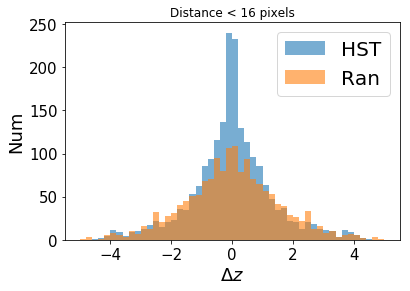

In [29]:
norm=False
disThres=8
plt.close()
hstcat =    pyfits.getdata('hstcatE.fits')
xyRef   =   np.vstack([hstcat['xI']/1.5,hstcat['yI']/1.5]).T
tree    =   scipy.spatial.cKDTree(xyRef)
dis1,inds=tree.query(xyRef,k=2)
msk=dis1[:,1]<disThres
print(np.sum(msk))
Dz1=hstcat[inds[:,1][msk]]['zphot']-hstcat[msk]['zphot']
hist1,bin1,_=plt.hist(Dz1,alpha=0.6,label='HST',bins=50,range=(-5,5),normed=norm)

hstcat =    pyfits.getdata('hstcatR.fits')
xyRef   =   np.vstack([hstcat['xI'],hstcat['yI']]).T
tree    =   scipy.spatial.cKDTree(xyRef)
dis2,inds=tree.query(xyRef,k=2)
msk=dis2[:,1]<disThres
print(np.sum(msk))
Dz2=hstcat[inds[:,1][msk]]['zphot']-hstcat[msk]['zphot']
hist2,bin2,_2=plt.hist(Dz2,alpha=0.6,label='Ran',bins=50,range=(-5,5),normed=norm)
bcent=(bin1[1:]+bin1[:-1])/2.
plt.xlabel(r'$\Delta z$')
plt.ylabel('Num')
plt.title('Distance < 16 pixels')
plt.legend()

Text(0.5, 0, 'Distance [pixel]')

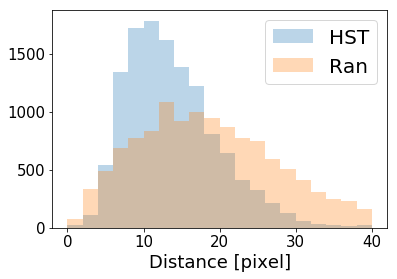

In [30]:
plt.hist(dis1[:,1],bins=20,alpha=0.3,range=(0,40),label='HST')
plt.hist(dis2[:,1],bins=20,alpha=0.3,range=(0,40),label='Ran')
plt.legend()
plt.xlabel('Distance [pixel]')

In [2]:
def calcDistanceAngle(a1, a2, d1, d2):
    a1_f64 = np.array(a1, dtype = np.float64)
    d1_f64 = np.array(d1, dtype = np.float64)
    a2_f64 = np.array(a2, dtype = np.float64)
    d2_f64 = np.array(d2, dtype = np.float64)
    return np.arccos(np.cos(d1_f64)*np.cos(d2_f64)*np.cos(a1_f64-a2_f64)+np.sin(d1_f64)*np.sin(d2_f64))

nside=4096 # healpix nside
maxmatch=1 # return closest match
radius=5/3600.

/lustre/work/xiangchong.li/ana/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(0, 30)

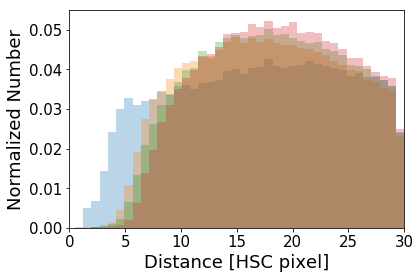

In [35]:
catAll=[]
afname=os.path.join(os.environ["homeWrk"],'COSMOS/Leauthaud2007/acs_clean.fits')
alexCat=pyfits.getdata(afname)
magLim=25.
msk=(alexCat['MU_CLASS']==1)&(alexCat['NEARSTAR']==1)&\
    (alexCat['MASKED']==1)&(alexCat['CLEAN']==1)
msk=msk&(alexCat['mag_auto']<magLim)
data=alexCat[msk]
catAll.append(data)
ra=data['ALPHA_J2000']
dec=data['DELTA_J2000']
cat=smatch.Catalog(ra, dec, radius, nside=nside)
# ra,dec,radius in degrees
cat.match_self(maxmatch=maxmatch)
raA=ra[cat.matches['i1']]/180.*np.pi
raB=ra[cat.matches['i2']]/180.*np.pi
decA=dec[cat.matches['i1']]/180.*np.pi
decB=dec[cat.matches['i2']]/180.*np.pi
disA=calcDistanceAngle(raA,raB,decA,decB)*180./np.pi*3600.
plt.hist(disA/0.168,alpha=0.3,range=(0.5,30),bins=40,label='Lea2007',normed=True)

for nm in ['BEST','MEDIAN','WORST']:
    hfname=os.path.join(os.environ["homeWrk"],\
        'galSim-HSC/database/s19-COSMOS/origin/COSMOS_WIDE_DEPTH_%s.fits' %nm)
    hCat=pyfits.getdata(hfname)
    msk=utilities.get_imag(hCat)<magLim
    data=hCat[msk]
    catAll.append(data)
    ra,dec=utilities.get_radec(data)
    cat=smatch.Catalog(ra, dec, radius, nside=nside)
    # ra,dec,radius in degrees
    cat.match_self(maxmatch=maxmatch)
    raA=ra[cat.matches['i1']]/180.*np.pi
    raB=ra[cat.matches['i2']]/180.*np.pi
    decA=dec[cat.matches['i1']]/180.*np.pi
    decB=dec[cat.matches['i2']]/180.*np.pi
    dis_tmp=calcDistanceAngle(raA,raB,decA,decB)*180./np.pi*3600.
    plt.hist(dis_tmp/0.168,alpha=0.3,range=(0.5,30),bins=40,label=nm,normed=True)
    del dis_tmp,raA,raB,decB,ra,dec,msk,data,hCat
    gc.collect()
#plt.legend()
plt.xlabel('Distance [HSC pixel]')
plt.ylabel('Normalized Number')
plt.xlim(0,30)

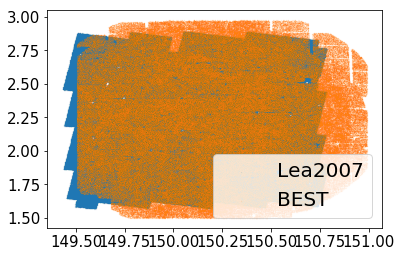

In [30]:
plt.close()
plt.scatter(catAll[0]['ALPHA_J2000'],catAll[0]['DELTA_J2000'],\
            s=0.01,label='Lea2007',alpha=0.4)
ii=1
for nm in ['BEST','MEDIAN','WORST']:
    ra,dec=utilities.get_radec(catAll[ii])
    plt.scatter(ra,dec,s=0.01,label=nm,alpha=0.4)
    ii+=1
    del ra,dec
    gc.collect()
    break
plt.legend()

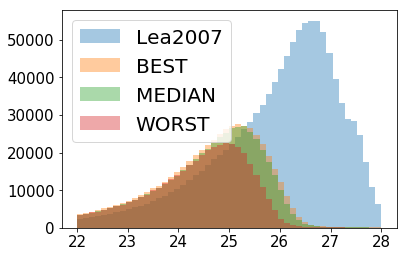

In [32]:
plt.close()
plt.hist(catAll[0]['mag_auto'],label='Lea2007',\
     alpha=0.4,range=(22.,28.),bins=50)
ii=1
for nm in ['BEST','MEDIAN','WORST']:
    mag=utilities.get_imag(catAll[ii])
    plt.hist(mag,label=nm,alpha=0.4,range=(22.,28.),bins=50)
    ii+=1
    del mag
    gc.collect()
plt.legend()

In [3]:
afname=os.path.join(os.environ["homeWrk"],'COSMOS/Leauthaud2007/acs_clean.fits')
alexCat=pyfits.getdata(afname)
msk=(alexCat['MU_CLASS']==1)&(alexCat['NEARSTAR']==1)&(alexCat['MASKED']==1)&(alexCat['CLEAN']==1)
data=alexCat[msk]
ra=data['ALPHA_J2000']
dec=data['DELTA_J2000']
cat=smatch.Catalog(ra, dec, radius, nside=nside)
# ra,dec,radius in degrees
cat.match_self(maxmatch=maxmatch)
raA=ra[cat.matches['i1']]/180.*np.pi
raB=ra[cat.matches['i2']]/180.*np.pi
decA=dec[cat.matches['i1']]/180.*np.pi
decB=dec[cat.matches['i2']]/180.*np.pi
disA=calcDistanceAngle(raA,raB,decA,decB)*180./np.pi*3600.

In [4]:
lfname=os.path.join(os.environ["homeWrk"],'COSMOS/Laigle2015/COSMOS2015_Laigle+_v1.1.fits')
laiCat=pyfits.getdata(lfname)
ra=laiCat['ALPHA_J2000']
dec=laiCat['DELTA_J2000']
cat=smatch.Catalog(ra, dec, radius, nside=nside)
# ra,dec,radius in degrees
cat.match_self(maxmatch=maxmatch)
raA=ra[cat.matches['i1']]/180.*np.pi
raB=ra[cat.matches['i2']]/180.*np.pi
decA=dec[cat.matches['i1']]/180.*np.pi
decB=dec[cat.matches['i2']]/180.*np.pi
disL=calcDistanceAngle(raA,raB,decA,decB)*180./np.pi*3600.

In [5]:
ifname=os.path.join(os.environ["homeWrk"],'COSMOS/Ilbert2009/cosmos_zphot_mag25.tbl')
ilbCat=ascii.read(ifname)
ra=ilbCat['ra']
dec=ilbCat['dec']
cat=smatch.Catalog(ra, dec, radius, nside=nside)
# ra,dec,radius in degrees
cat.match_self(maxmatch=maxmatch)
raA=ra[cat.matches['i1']]/180.*np.pi
raB=ra[cat.matches['i2']]/180.*np.pi
decA=dec[cat.matches['i1']]/180.*np.pi
decB=dec[cat.matches['i2']]/180.*np.pi
disI=calcDistanceAngle(raA,raB,decA,decB)*180./np.pi*3600.

(0, 80000)

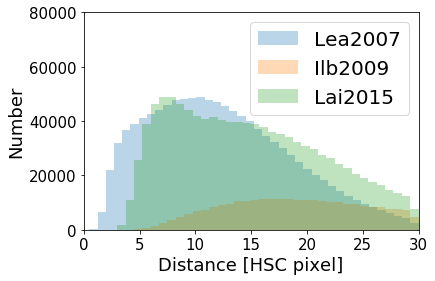

In [6]:
plt.hist(disA/0.168,alpha=0.3,range=(0.5,30),bins=40,label='Lea2007')
plt.hist(disI/0.168,alpha=0.3,range=(0.0,30),bins=40,label='Ilb2009')
plt.hist(disL/0.168,alpha=0.3,range=(0.0,30),bins=40,label='Lai2015')
plt.legend()
plt.xlabel('Distance [HSC pixel]')
plt.ylabel('Number')
plt.xlim(0,30)
plt.ylim(0,80000)

Galsim fitting: sigma=0.167, flux=14.03 that is 11.05 percent
14.028927896108508


/lustre/work/xiangchong.li/ana/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


29.92125984251969

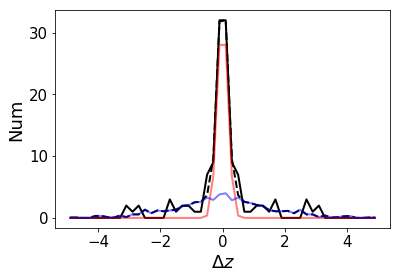

In [195]:
def func(x, a, b, c):
    return a * np.exp(-b * x**2)+c*hist2
popt, pcov = curve_fit(func,bcent,hist1)
plt.plot(bcent,hist1,c='black')
plt.plot(bcent,func(bcent,*popt),c='black',ls='--')
plt.plot(bcent,popt[0]*np.exp(-popt[1]* bcent**2),c='red',alpha=0.5)
flux=popt[0]*np.sqrt(np.pi/popt[1])
print(r'Galsim fitting: sigma=%.3f, flux=%.2f that is %.2f percent' %(np.sqrt(1./popt[1]/2.),flux,100*flux/np.sum(hist1)))
plt.plot(bcent,popt[2]*hist2,c='blue',alpha=0.5)
plt.xlabel(r'$\Delta z$')
plt.ylabel('Num')
print(np.sum(popt[0]*np.exp(-popt[1]* bcent**2))*(bcent[1]-bcent[0]))
mask=np.abs(bcent)>0.5
np.sum(hist1[mask])/np.sum(hist1)*100

Exponential fitting: sigma=0.189, flux=61.52


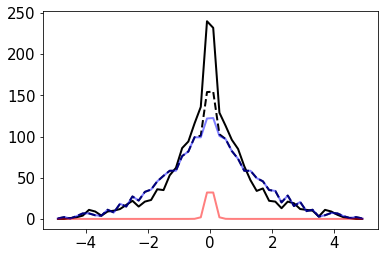

In [174]:
def func(x,a,b,c):
    return a*np.exp(-b * np.abs(x))+c*hist2
plt.plot(bcent,hist1,c='black')
plt.plot(bcent,func(bcent,*popt),c='black',ls='--')
plt.plot(bcent,popt[0]*np.exp(-popt[1]* np.abs(bcent)),c='red',alpha=0.5)
print(r'Exponential fitting: sigma=%.3f, flux=%.2f' %(np.sqrt(1./popt[1]/2.),popt[0]*np.sqrt(np.pi/popt[1])))
plt.plot(bcent,popt[2]*hist2,c='blue',alpha=0.5)

0.236503243842799


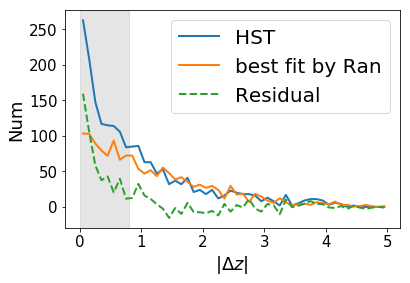

In [124]:
bcent=(bin1[1:]+bin1[:-1])/2.
hist1x=hist1[bcent>0.3]
hist2x=hist2[bcent>0.3]
par2=np.sum(hist1x*hist2x)/np.sqrt(np.sum(hist2x*hist2x))
bfit=par2*hist2/np.sqrt(np.sum(hist2*hist2))
res=hist1-bfit
plt.plot(bcent,hist1,label='HST')
plt.plot(bcent,bfit,label='best fit by Ran')
plt.plot(bcent,res,'--',label='Residual')
plt.axvspan(0,0.8,alpha=0.2, color='gray')
plt.xlabel(r'$|\Delta z|$')
plt.ylabel('Num')
print(np.sum(res[bcent<0.8])/np.sum(hist1))
plt.legend()